# Step 2: Importing libraries and datasets to use

In [2]:
# Import Pandas to manage the relational datasets
import pandas as pd

In [3]:
# Import Matplotlib to allow further customization of plots
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# Import Seaborn to provide attractive visualizations leveraging Matplotlib
import seaborn as sns

## Read in the Dataset

In [5]:
# Import the Pokemon dataset and set index position to column 0, or the first column
df = pd.read_csv('Pokemon.csv', index_col=0)

In [6]:
# Read the first 5 observations of the Dataset
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [7]:
# Read a description of the dataset
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


# Step 3: Using Seaborn's plotting functions

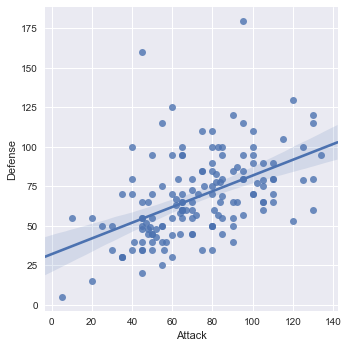

In [8]:
# Create the Default scatterplot
sns.lmplot(x='Attack', y='Defense', data=df)

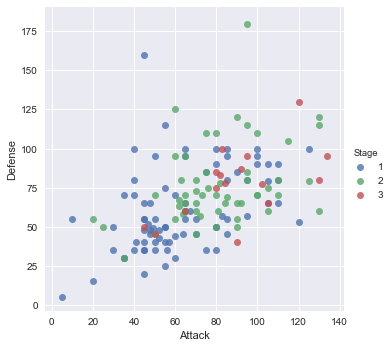

In [9]:
# Tweak the scatter plot to remove the regression line and adjust the observation colors by stage
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Stage')

# Step 4: Using Matplotlib to tweak the axis limits

(0, 142.25647612435475)

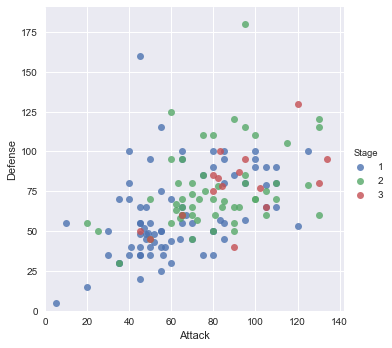

In [10]:
# Plot data with Seaborn
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Stage')

# Tweak the x and y axis with Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

# Step 5: The role of Pandas with Seaborn

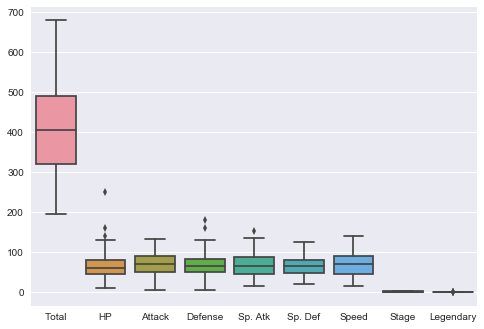

In [11]:
# Generate a boxplot
sns.boxplot(data=df)

In [12]:
# Remove unnecessary columns via Pandas and then replot data
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

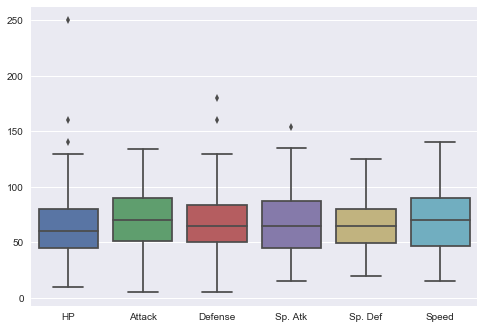

In [13]:
# Re-plot data
sns.boxplot(data=stats_df)

# Step 6: Adjusting Seaborn Themes


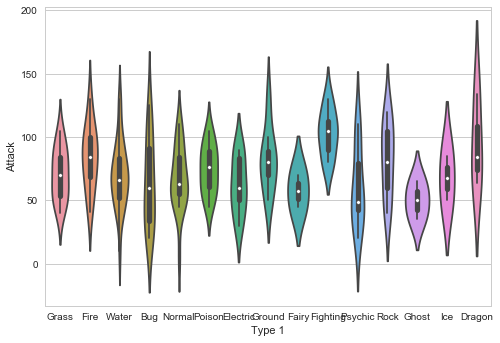

In [14]:
# Changing the themes
sns.set_style('whitegrid')

# Plot the data with a violin plot to display the distributions
sns.violinplot(x='Type 1', y='Attack', data=df)

# Step 7: Create Custom Color Palettes via Python Lists

In [15]:
# Create custom color palette
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

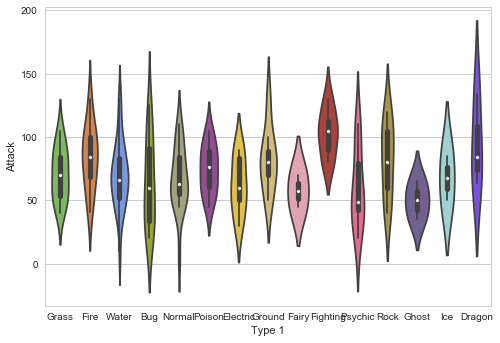

In [16]:
# Use palette argument to pass in custom colors
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

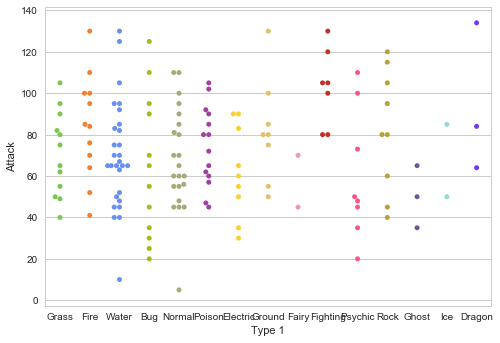

In [17]:
# Create Swarm plot to display individual points and stack similar values
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

# Step 8: Overlaying plots

In [18]:
# Adjust the size of the figure using the function figure() and figsize attribute in Matplotlib
plt.figure(figsize=(10,6))

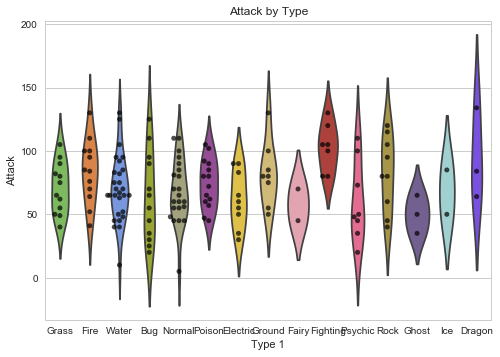

In [21]:
# Create Overlaying plots of violin and swarm plots
sns.violinplot(x='Type 1', y='Attack', data=df, inner=None, palette=pkmn_type_colors)
sns.swarmplot(x='Type 1', y='Attack', data=df, color='k', alpha=0.7)

# Create title for the plot
plt.title('Attack by Type')

# Step 9: Putting it all together Y'all...

In [22]:
# Merge the various six stats into one variable and create new rows for each 
melted_df = pd.melt(stats_df, id_vars=['Name', 'Type 1', 'Type 2'], var_name='Stat')

# Print the top 5 rows of the melted dataframe
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [24]:
# Conduct Shape comparison to verify the data has been melted
print (stats_df.shape)
print (melted_df.shape)

(151, 9)
(906, 5)


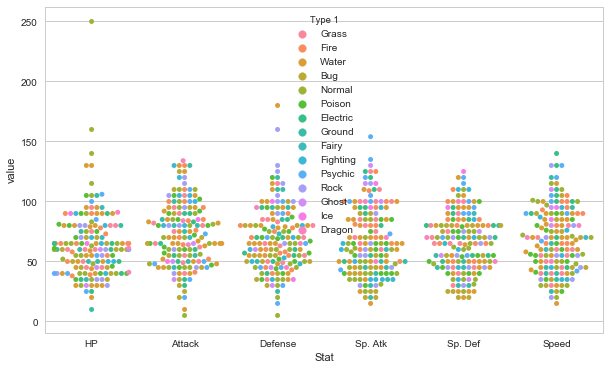

In [26]:
# Adjust the size of the figure using the function figure() and figsize attribute in Matplotlib
plt.figure(figsize=(10,6))

# Create a swarmplot with the melted data
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1')

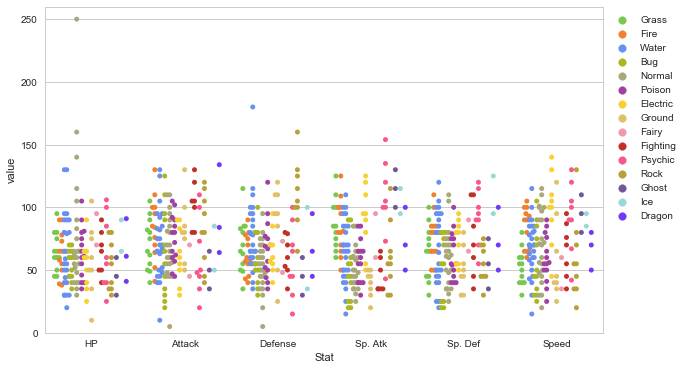

In [27]:
# Customize the figure 
# Enlarge the figure
plt.figure(figsize=(10,6))

# Split the data points up by hue color
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1', split=True, palette= pkmn_type_colors)

# Alter the y-axis settings
plt.ylim(0,260)

# Reposition the Legend to the right side of the figure
plt.legend(bbox_to_anchor=(1,1), loc=2)